In [1]:
import os
import numpy as np
import re
import pickle
import sys
import matplotlib.pyplot as plt
import pandas as pd

sys.path.insert(1, '../')
from SeasonalPlot_Functions import *

In [2]:
home_dir = '/nfs/a319/gy17m2a/PhD/'
home_dir2 = '/nfs/a161/gy17m2a/PhD/'

In [20]:
quintile_mapping = {1: 'F2', 2: 'F1', 3: 'C', 4: 'B1', 5: 'B2'}
quintile_mapping_thirds = {1: 'F', 2: 'C', 3: 'B'}
areas = ['NW', 'NE', 'ME', 'SE', 'SW']

In [6]:
# ems_present = ['bc005', 'bc006', 'bc007', 'bc009', 'bc010', 'bc011', 'bc012', 'bc013', 'bc015', 'bc016', 'bc017', 'bc018']
# ems_future = ['bb189','bb192', 'bb195', 'bb198', 'bb201', 'bb204','bb208' ,'bb211','bb216', 'bb219','bb222','bb225']

### Load and prepare data

In [4]:
with open(home_dir + f"ProcessedData/AMAX_Events/UKCP18_30mins/Present/results_each_dur_present.pickle", 'rb') as handle:
    results_present = pickle.load(handle)
with open(home_dir + f"ProcessedData/AMAX_Events/UKCP18_30mins/Future/results_each_dur_future.pickle", 'rb') as handle:
    results_future = pickle.load(handle)

In [15]:
with open(home_dir +  f"ProcessedData/AMAX_Events/UKCP18_30mins/Present/event_props_dict_present.pickle", 'rb') as handle:
    events_props_dict_present = pickle.load(handle)
with open(home_dir + f"ProcessedData/AMAX_Events/UKCP18_30mins/Future/event_props_dict_future.pickle", 'rb') as handle:
    events_props_dict_future = pickle.load(handle)    

In [6]:
dur_present_events_dict, dur_present_event_props_dict, dur_present_event_profiles_dict = results_present
dur_future_events_dict, dur_future_event_props_dict, dur_future_event_profiles_dict = results_future

## Compare seasonal distribution for different durations AND between present and future

This is using the durations which we extracted annual maxima for

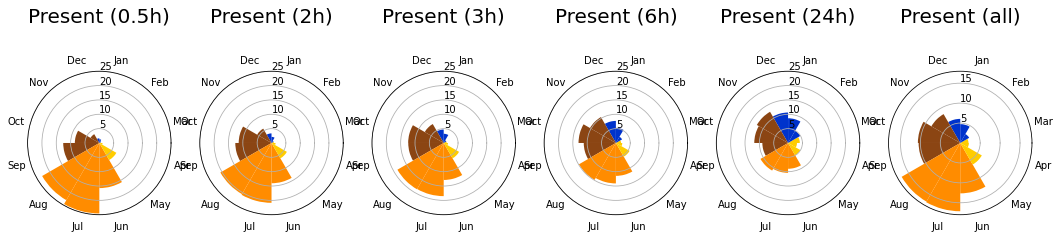

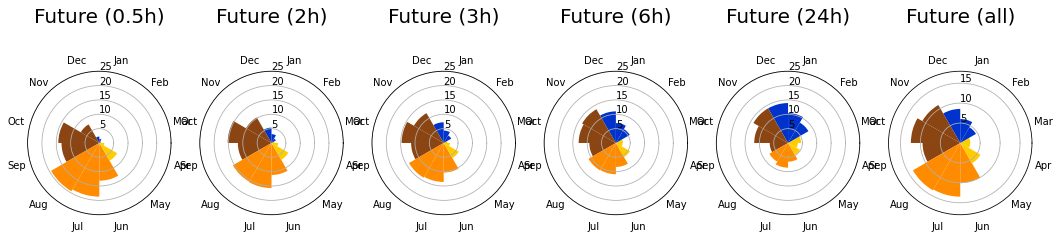

In [11]:
fig, axes = plt.subplots(1, 6, figsize=(18, 10), subplot_kw={'polar': True})
fig.subplots_adjust(hspace=0.5)

# List of durations and corresponding subplot titles
durations = ['<4hr', '4-12hr', '12hr+']
titles = ["Present (<4hr)",  "Present (4-12hr)", "Present (12hr+)"]

# Loop through durations, axes, and titles
for ax, duration, title in zip(axes, durations, titles):
    if duration in dur_present_event_props_dict:  # Only plot for available durations
        plot_polar_months_plot(dur_present_event_props_dict[duration], ax, title, 25, name_variable_to_plot='Percentage')
plot_polar_months_plot(events_props_dict_present, axes[5], "Present (all)", 18, name_variable_to_plot = 'Percentage')    
        
fig, axes = plt.subplots(1, 6, figsize=(18, 10), subplot_kw={'polar': True})
fig.subplots_adjust(hspace=0.5)

# List of durations and corresponding subplot titles
durations = ['0.5', '2', '3', '6', '24']
titles = ["Future (<4hr)",  "Future (4-12hr)", "Future (12hr+)"]

# Loop through durations, axes, and titles
for ax, duration, title in zip(axes, durations, titles):
    if duration in dur_future_event_props_dict:  # Only plot for available durations
        plot_polar_months_plot(dur_future_event_props_dict[duration], ax, title, 25, name_variable_to_plot='Percentage')
        
plot_polar_months_plot(events_props_dict_future, axes[5], "Future (all)", 18, name_variable_to_plot = 'Percentage')        

plt.show()
        

In [ ]:
fig, axes = plt.subplots(1, 6, figsize=(18, 10), subplot_kw={'polar': True})
fig.subplots_adjust(hspace=0.5)

# List of durations and corresponding subplot titles
durations = ['0.5', '2', '3', '6', '24']
titles = ["Present (0.5h)",  "Present (2h)", "Present (3h)", "Present (6h)", "Present (24h)"]

# Loop through durations, axes, and titles
for ax, duration, title in zip(axes, durations, titles):
    if duration in dur_present_event_props_dict:  # Only plot for available durations
        plot_polar_months_plot(dur_present_event_props_dict[duration], ax, title, 25, name_variable_to_plot='Percentage')
plot_polar_months_plot(events_props_dict_present, axes[5], "Present (all)", 18, name_variable_to_plot = 'Percentage')    
        
fig, axes = plt.subplots(1, 6, figsize=(18, 10), subplot_kw={'polar': True})
fig.subplots_adjust(hspace=0.5)

# List of durations and corresponding subplot titles
durations = ['0.5', '2', '3', '6', '24']
titles = ["Future (0.5h)",  "Future (2h)", "Future (3h)", "Future (6h)", "Future (24h)"]

# Loop through durations, axes, and titles
for ax, duration, title in zip(axes, durations, titles):
    if duration in dur_future_event_props_dict:  # Only plot for available durations
        plot_polar_months_plot(dur_future_event_props_dict[duration], ax, title, 25, name_variable_to_plot='Percentage')
        
plot_polar_months_plot(events_props_dict_future, axes[5], "Future (all)", 18, name_variable_to_plot = 'Percentage')        

plt.show()
        

## Comparing plotting count of events vs percentage of events

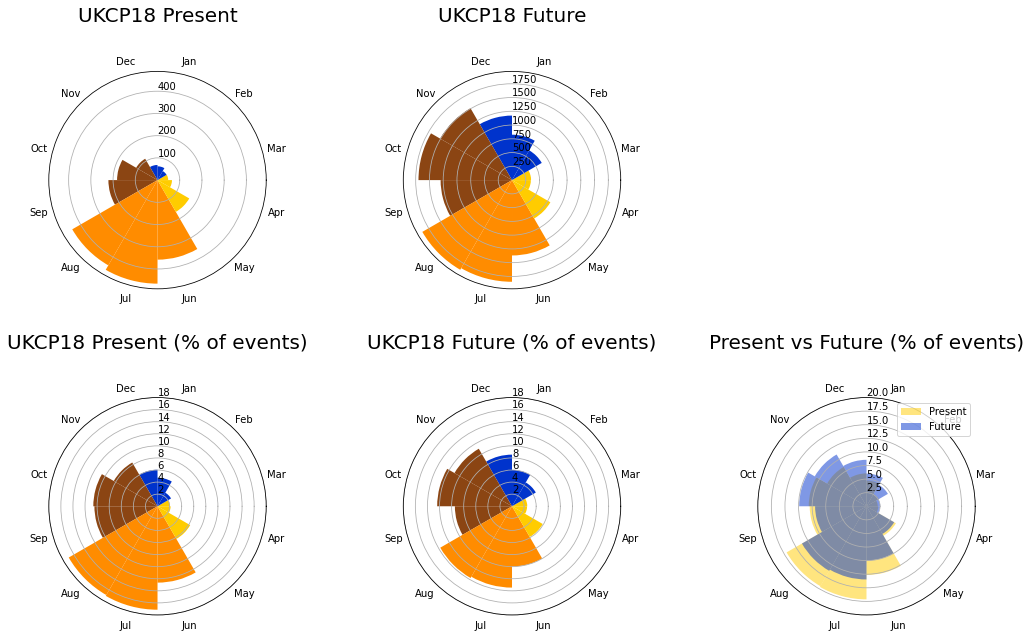

In [29]:
fig = plt.figure(figsize=(18, 10))
fig.subplots_adjust(hspace=0.5)
ax1 = plt.subplot(231, polar=True)
ax2 = plt.subplot(232, polar=True)
plot_polar_months_plot(events_props_dict_present, ax1, "UKCP18 Present", 30, name_variable_to_plot = 'Count')
plot_polar_months_plot(events_props_dict_future, ax2,"UKCP18 Future", 30, name_variable_to_plot = 'Count')

ax3 = plt.subplot(234, polar=True)
ax4 = plt.subplot(235, polar=True)
ax5 = plt.subplot(236, polar=True)
plot_polar_months_plot(events_props_dict_present, ax3, "UKCP18 Present (% of events)", 18, name_variable_to_plot = 'Percentage')
plot_polar_months_plot(events_props_dict_future, ax4,"UKCP18 Future (% of events)", 18, name_variable_to_plot = 'Percentage')
plot_polar_months_plot_overlay(events_props_dict_present, events_props_dict_future, ax5, "Present vs Future (% of events)")

## All events, divided geographically

In [ ]:
# Filter to select only entries with 'C' in the inner dictionary for the key 'area'
SW_events = {key: value for key, value in events_props_dict_present.items() if value['area'] == 'SW'}
SE_events = {key: value for key, value in events_props_dict_present.items() if value['area'] == 'SW'}
NE_events = {key: value for key, value in events_props_dict_present.items() if value['area'] == 'NE'}
NW_events = {key: value for key, value in events_props_dict_present.items() if value['area'] == 'NW'}
ME_events =  {key: value for key, value in events_props_dict_present.items() if value['area'] == 'ME'}

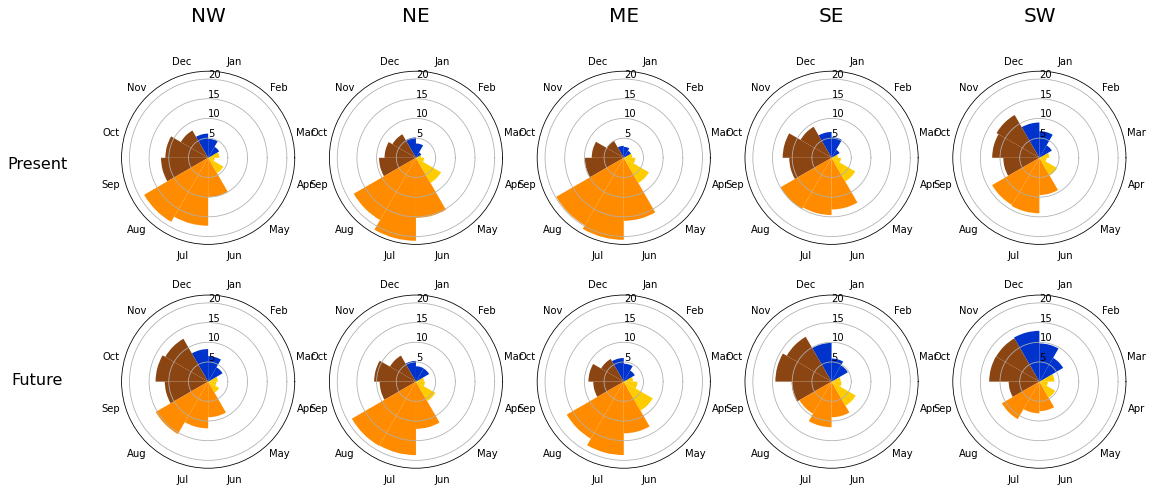

In [25]:
# Create subplots with 2 rows and 5 columns for present and future
fig, axes = plt.subplots(2, 5, figsize=(18, 10), subplot_kw={'polar': True})
fig.subplots_adjust(hspace=-0.3)

# Loop through the areas for both present and future
for i, area in enumerate(areas):
    # Filter for present data
    present_events = {key: value for key, value in events_props_dict_present.items() if value['area'] == area}
    
    # Filter for future data
    future_events = {key: value for key, value in events_props_dict_future.items() if value['area'] == area}
    
    # Plot for present data (1st row)
    plot_polar_months_plot(present_events, axes[0, i], area, 22, name_variable_to_plot='Percentage')
    
    # Plot for future data (2nd row)
    plot_polar_months_plot(future_events, axes[1, i], None, 22, name_variable_to_plot='Percentage')
    
# Add row labels for "Present" and "Future"
fig.text(0.06, 0.65, 'Present', va='center', ha='center', fontsize=16, rotation='horizontal')
fig.text(0.06, 0.35, 'Future', va='center', ha='center', fontsize=16, rotation='horizontal');    